# Performance Analysis

## Objective
This notebook evaluates strategy performance using:

- Cumulative P&L
- Drawdowns
- Win rate
- P&L distributions
- Ticker-wise behavior

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
import pandas as pd

from src.analysis.metrics import performance_summary, ticker_summary
from src.analysis.plots import (
    plot_equity_and_dd,
    plot_pnl_distribution,
    plot_total_pnl_by_ticker,
    plot_equity_by_ticker
)

from src.utils.config import TICKERS

In [3]:
df = pd.read_csv(PROJECT_ROOT / "data" / "earnings_simulated.csv")
df.head()

,Ticker,Straddle_PnL,IronCondor_PnL
0,AAPL,8.615937,-4.490565
1,AAPL,-0.160302,0.003946
2,AAPL,0.895562,-0.051751
3,AAPL,10.472456,-5.303927
4,AAPL,2.159368,-0.131674


In [4]:
plots_dir = PROJECT_ROOT / "plots"
equity_dir = plots_dir / "equity"
dist_dir   = plots_dir / "distribution"
ticker_dir = plots_dir / "ticker"

for d in [equity_dir, dist_dir, ticker_dir]:
    d.mkdir(parents=True, exist_ok=True)

In [5]:
straddle_stats = performance_summary(df["Straddle_PnL"])
condor_stats   = performance_summary(df["IronCondor_PnL"])

pd.DataFrame(
    [straddle_stats, condor_stats],
    index=["Straddle", "Iron Condor"]
)

,Total Trades,Mean PnL,Median PnL,Win Rate,Total PnL,Max Drawdown
Straddle,400,4.798326,3.780126,0.8150,1919.330343,3.185382
Iron Condor,400,-1.973681,-1.094287,0.3025,-789.472348,784.985729


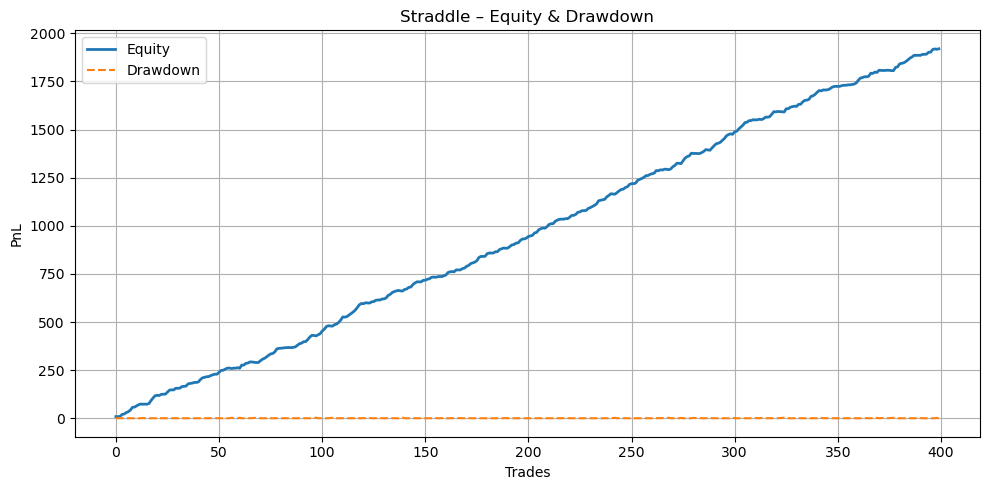

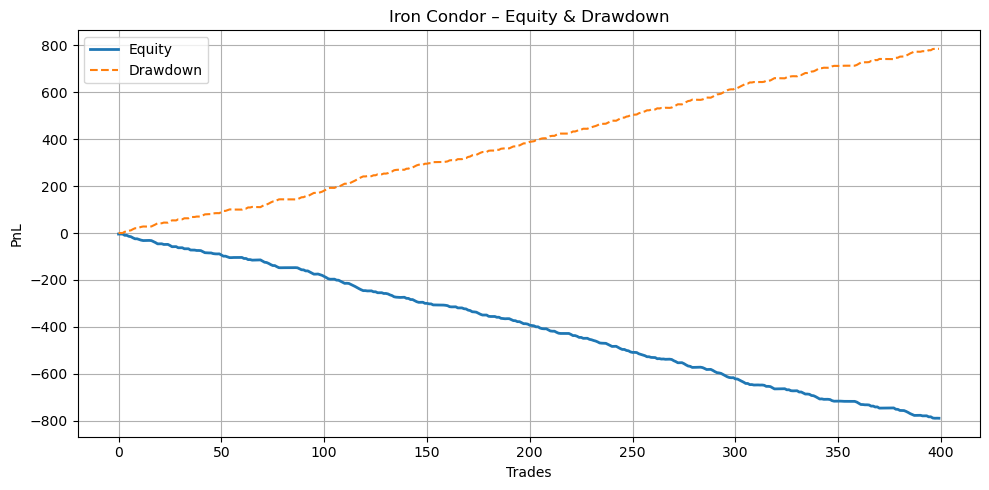

In [6]:
plot_equity_and_dd(
    df["Straddle_PnL"], "Straddle", equity_dir / "straddle_equity.png"
)

plot_equity_and_dd(
    df["IronCondor_PnL"], "Iron Condor", equity_dir / "ironcondor_equity.png"
)

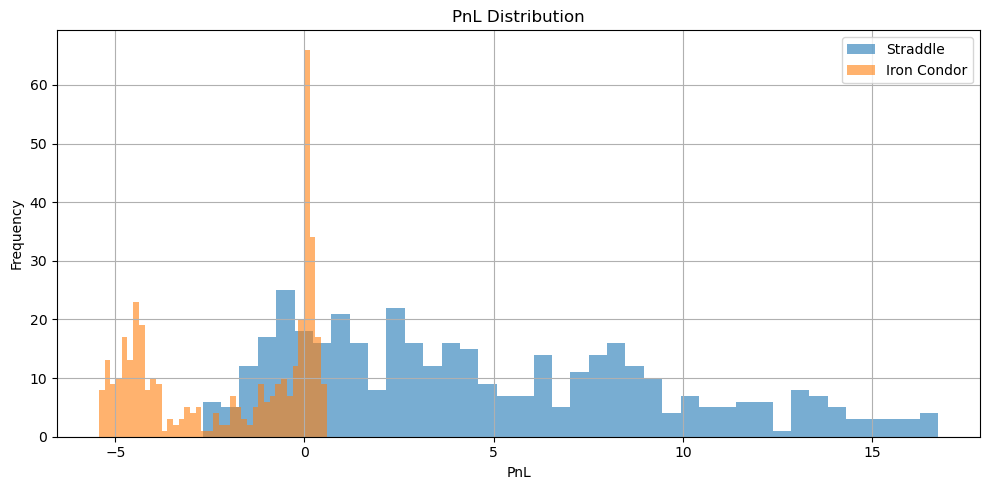

In [7]:
plot_pnl_distribution(df, dist_dir / "pnl_distribution.png")

In [8]:
ticker_summary(df, "Straddle_PnL")

,Total_Trades,Win_Rate,Avg_PnL,Median_PnL,Total_PnL,Max_Drawdown
Ticker,,,,,,
AMZN,40,0.850,5.815544,6.202384,232.621743,-3.053618
NVDA,40,0.900,5.545960,4.759691,221.838402,-1.264877
JPM,40,0.775,5.482633,4.532110,219.305336,-2.867965
JNJ,40,0.800,5.390195,4.429625,215.607791,-3.185382
META,40,0.875,4.903501,4.145053,196.140046,-1.426165
AAPL,40,0.850,4.651951,3.051763,186.078024,-1.739614
MSFT,40,0.825,4.428049,3.010013,177.121955,-3.151361
TSLA,40,0.725,4.424236,2.745705,176.969439,-2.066259
WMT,40,0.775,3.742958,2.319405,149.718333,-2.854327


In [9]:
ticker_summary(df, "IronCondor_PnL")

,Total_Trades,Win_Rate,Avg_PnL,Median_PnL,Total_PnL,Max_Drawdown
Ticker,,,,,,
WMT,40,0.400,-1.402851,-0.143426,-56.114032,-56.864212
GOOGL,40,0.325,-1.560952,-0.495553,-62.438060,-62.556229
TSLA,40,0.400,-1.723222,-0.407997,-68.928865,-63.741849
MSFT,40,0.300,-1.838696,-0.547067,-73.547833,-73.000614
AAPL,40,0.350,-1.863271,-0.619865,-74.530850,-70.067243
META,40,0.225,-2.004504,-1.114149,-80.180150,-78.658281
NVDA,40,0.175,-2.265922,-2.105642,-90.636881,-85.876495
JNJ,40,0.300,-2.289905,-1.800330,-91.596202,-92.572658
JPM,40,0.250,-2.347724,-2.160097,-93.908950,-89.953066
